In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime



In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

636

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=800ac6692f095a28a3046b68ec8bf132


In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bambous virieux
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | port lincoln
Processing Record 4 of Set 1 | new norfolk
Processing Record 5 of Set 1 | ulverstone
Processing Record 6 of Set 1 | lewistown
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 10 of Set 1 | bonavista
Processing Record 11 of Set 1 | paamiut
Processing Record 12 of Set 1 | flin flon
Processing Record 13 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | de-kastri
Processing Record 17 of Set 1 | geraldton
Processing Record 18 of Set 1 | butaritari
Processing Record 19 of Set 1 | zhoucheng
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | 

Processing Record 39 of Set 4 | tuktoyaktuk
Processing Record 40 of Set 4 | mataram
Processing Record 41 of Set 4 | kamenskoye
City not found. Skipping...
Processing Record 42 of Set 4 | vaitape
Processing Record 43 of Set 4 | viedma
Processing Record 44 of Set 4 | sioux lookout
Processing Record 45 of Set 4 | raga
Processing Record 46 of Set 4 | olafsvik
Processing Record 47 of Set 4 | qaqortoq
Processing Record 48 of Set 4 | mahuva
Processing Record 49 of Set 4 | aleksandrovskiy zavod
Processing Record 50 of Set 4 | grand gaube
Processing Record 1 of Set 5 | wanaka
Processing Record 2 of Set 5 | ilulissat
Processing Record 3 of Set 5 | la palma
Processing Record 4 of Set 5 | labutta
City not found. Skipping...
Processing Record 5 of Set 5 | fukue
Processing Record 6 of Set 5 | mount gambier
Processing Record 7 of Set 5 | parakou
Processing Record 8 of Set 5 | high level
Processing Record 9 of Set 5 | bairiki
Processing Record 10 of Set 5 | sorvag
City not found. Skipping...
Processin

Processing Record 29 of Set 8 | abonnema
Processing Record 30 of Set 8 | burnie
Processing Record 31 of Set 8 | khandyga
Processing Record 32 of Set 8 | eydhafushi
Processing Record 33 of Set 8 | sao bernardo
Processing Record 34 of Set 8 | tuy hoa
Processing Record 35 of Set 8 | tocopilla
Processing Record 36 of Set 8 | krasnoyarsk
Processing Record 37 of Set 8 | esmeraldas
Processing Record 38 of Set 8 | vardo
Processing Record 39 of Set 8 | swidwin
Processing Record 40 of Set 8 | saldanha
Processing Record 41 of Set 8 | laredo
Processing Record 42 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 43 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 44 of Set 8 | bermeo
Processing Record 45 of Set 8 | linjiang
Processing Record 46 of Set 8 | meulaboh
Processing Record 47 of Set 8 | katobu
Processing Record 48 of Set 8 | skalistyy
City not found. Skipping...
Processing Record 49 of Set 8 | sitka
Processing Record 50 of Set 8 | samusu
City not found. Skipp

Processing Record 21 of Set 12 | cody
Processing Record 22 of Set 12 | tabuk
Processing Record 23 of Set 12 | kokkola
Processing Record 24 of Set 12 | pokhara
Processing Record 25 of Set 12 | aklavik
Processing Record 26 of Set 12 | lokosovo
Processing Record 27 of Set 12 | sao filipe
Processing Record 28 of Set 12 | grindavik
Processing Record 29 of Set 12 | naze
Processing Record 30 of Set 12 | kholodnyy
Processing Record 31 of Set 12 | jalu
Processing Record 32 of Set 12 | varhaug
Processing Record 33 of Set 12 | taitung
Processing Record 34 of Set 12 | panjwin
City not found. Skipping...
Processing Record 35 of Set 12 | pocoes
Processing Record 36 of Set 12 | mahon
Processing Record 37 of Set 12 | el alto
Processing Record 38 of Set 12 | ortakoy
Processing Record 39 of Set 12 | mozarlandia
Processing Record 40 of Set 12 | canutama
Processing Record 41 of Set 12 | ola
Processing Record 42 of Set 12 | oussouye
Processing Record 43 of Set 12 | kalmunai
Processing Record 44 of Set 12 |

In [7]:

# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bambous Virieux,-20.34,57.76,79.00,74,40,11.41,MU,2020-05-27 12:17:35
1,Yerbogachen,61.28,108.01,45.01,76,88,12.41,RU,2020-05-27 12:17:35
2,Port Lincoln,-34.73,135.87,55.17,83,23,6.20,AU,2020-05-27 12:17:35
3,New Norfolk,-42.78,147.06,48.00,85,72,2.62,AU,2020-05-27 12:17:36
4,Ulverstone,-41.15,146.17,55.00,77,93,3.00,AU,2020-05-27 12:17:36
5,Lewistown,40.60,-77.57,68.00,100,20,2.53,US,2020-05-27 12:17:36
6,Port Alfred,-33.59,26.89,61.00,58,100,5.99,ZA,2020-05-27 12:17:36
7,Punta Arenas,-53.15,-70.92,37.40,93,75,10.29,CL,2020-05-27 12:17:36
8,Bonavista,48.65,-53.11,45.00,79,99,4.00,CA,2020-05-27 12:17:36
9,Paamiut,61.99,-49.67,35.02,95,100,4.43,GL,2020-05-27 12:17:36


In [8]:
New_Order_Column=["City", "Country","Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [9]:
city_data_df=city_data_df[New_Order_Column]

In [10]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bambous Virieux,MU,2020-05-27 12:17:35,-20.34,57.76,79.00,74,40,11.41
1,Yerbogachen,RU,2020-05-27 12:17:35,61.28,108.01,45.01,76,88,12.41
2,Port Lincoln,AU,2020-05-27 12:17:35,-34.73,135.87,55.17,83,23,6.20
3,New Norfolk,AU,2020-05-27 12:17:36,-42.78,147.06,48.00,85,72,2.62
4,Ulverstone,AU,2020-05-27 12:17:36,-41.15,146.17,55.00,77,93,3.00
...,...,...,...,...,...,...,...,...,...
580,Springdale,US,2020-05-27 12:17:08,36.19,-94.13,63.00,100,90,1.68
581,Zalantun,CN,2020-05-27 12:18:44,48.00,122.72,61.48,40,0,3.91
582,Sosnowiec,PL,2020-05-27 12:18:44,50.29,19.10,68.00,46,20,10.87
583,Kampot,KH,2020-05-27 12:18:44,10.62,104.18,86.00,74,20,5.82


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
import time

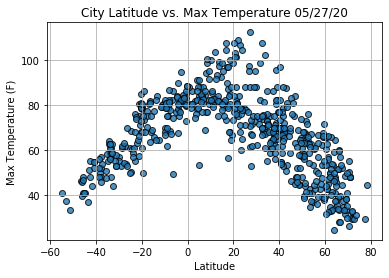

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

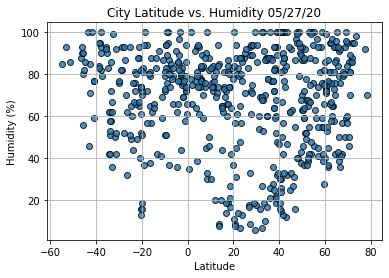

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

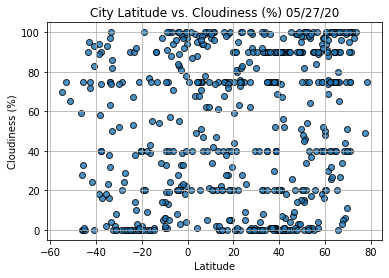

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

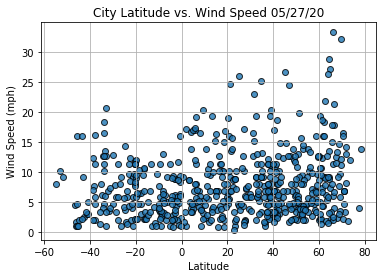

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()